In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, randint


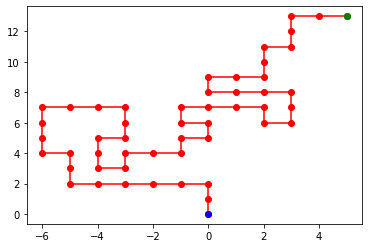

In [9]:
#problem 1
#simulate a point that can make random movements, but the point cannot cross its original path (self avoiding random walk)
#in the event that the particle traps itself inside its own path and cannot move without crossing an already made path, then the loop will need to be terminated

#define plotting function that takes list
def plotter(x):
    xs,ys = np.array(x).T
    #plot the points
    plt.plot(xs,ys,'-o', color = 'r')
    #make first point blue
    plt.plot(xs[0], ys[0], 'o', color = 'b')
    #make last point green
    plt.plot(xs[-1], ys[-1], 'o', color = 'g')
    plt.show()
    
    
#define function that will move the particle, and add it to an array 
def snake(N):
    from numpy.random import choice
    import numpy as np
    steps = N
    start = (0,0)
    x,y = start
    #make empty array to store the coordinates for each step 
    snakemap = [start]
    while steps > 0:
        #check if the coordinate is trapped. if it is, return the function.
        #set counter to keep track of possible moves. If the move is free, label that position as "free"
        counter = np.zeros(4, dtype = 'int')
        for coord in snakemap:
            #check right
            if (x+1,y) == coord:
                counter[0] = 1
                
            #check left    
            elif (x-1,y) == coord:
                counter[1] = 1
                
            #check up    
            elif (x,y+1) == coord:
                counter[2] = 1
                
            #check down    
            elif (x,y-1) == coord:
                counter[3] = 1
        #if all moves are taken, len of counter will be 4. return function so that the program stops
        if counter[0] == 1 and counter[1] == 1 and counter[2] == 1 and counter[3] == 1:
            print("No moves available.")
            return plotter(snakemap)
        
        else:
            #use while loop to force a move in the event that a move is selected that can't actually occur
            w = 1
            while w == 1:
                
            #if move still available, go with next step
                move = choice(('up','down','left','right'))
            #the possible moves were tracked with 'counter' earlier. if the counter has a move in it's list
            #then the snake cannot move in that direction
            
            #'right' will always be first in the coord list
                if move == 'right' and counter[0] != 1:
                    x += 1
                    break
                    
            #'left' second in the coord list
                elif move == 'left' and counter[1] != 1:
                    x -= 1
                    break
        
            #'up' third in the coord list
                elif move == 'up' and counter[2] != 1:
                    y += 1 
                    break
                    
            #"down" will always be last in the list
                elif move == 'down' and counter[3] != 1:
                    y -= 1
                    break
                else:
                    continue
        #add the new coordinate to the list
        snakemap.append((x,y))
        steps -= 1
    return plotter(snakemap)

snake(50)


In [15]:
#Problem 2
#create a program that simulates the monty hall problem, and calculates the probability of winning the game if you switch your initial guess each time (should get 2/3 probabilty of win by switching)

def montyhall(N):
    from numpy.random import choice
    
    #two scenarios: can either pick an empty door on initial guess, or pick door with car
    
    trials = N
    switch = 0
    noswitch = 0
    #run N number of trials
    while trials > 0:
        doors = [0,0,0]
        #select which door will have the car 
        car = choice(3)
        doors[car] = 1
        #select contestant's pick for the door
        door_pick = choice(3)
        doors[door_pick] = 2
 
        #count number of empty doors in sequence
        zeros = 0
        for i in doors:
            if i == 0:
                zeros += 1
                
        #can only be 1 or 2 empty doors depending on what the user picked
        
        #if one zero remains, the contestant picked the other empty door. 
        #host must reveal the unpicked empty door
        if zeros == 1:
            #assuming that the contestant switches, this would lead to a win because the guest
            #initially picked an empty door, and now switched to the winning door 
            #since the host removed the only remaining empty door
            switch += 1
            
            
        #if two zeros remain, host has choice of which door to reveal 
        #assuming that the contestant switches each time, switching when there are two empty doors
        #(i.e. picked the correct door on the first try) will lead to a loss. staying on the same door will
        #lead to a win
        elif zeros == 2:
            noswitch += 1
        
        
        trials -= 1
    
    print('Probability of winning if the contestant picks a new door is %.2g' %(switch/N))
    print('Probability of winning if the contestant stays with the original door %.2g' %(noswitch/N))
    
montyhall(10000)

Probability of winning if the contestant picks a new door is 0.67
Probability of winning if the contestant stays with the original door 0.33
